<a href="https://colab.research.google.com/github/AgnieszkaBlok/hypertension-classification/blob/main/Klasyfikator_stanu_choroby_na_nadci%C5%9Bnienie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikator stanu choroby na nadciśnienie

W notatniku podjęto działania, aby uzyskać możliwie najlepszy model klasyfikacji stanu choroby na nadciśnienie (y=high_b_pressure) uwzględniający cechy mające największe znaczenie.

Zbiór danych utworzony na podstawie badań NHANES 2005-2006:
<br>https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Questionnaire&CycleBeginYear=2005
<br>https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&Cycle=2005-2006

## Opis atrybutów:

* ALC_12m - ile dni w roku pijesz jakikolwiek alkohol
* MEAN_ACT - kategoria deklarowanej aktywności fizycznej:
1 - Mainly sit, 2 - Walk a lot, 3 - Carry light loads, 4 - Carry heavy loads
* VIG_ACT - duża aktywność fizyczna 1 - tak, 2 - nie
* VIG_ACT - średnia aktywność fizyczna 1 - tak, 2 - nie
* waist - obwód w pasie
* diabetes - cukrzyca 1 - tak, 2 - nie
* high_b_pressure - chory na nadciśnienie, 1 - tak, 2 - nie
* gender - 1-mężczyzna, 2-kobieta
* pulse - tętno
* sys_pressure - ciśnienie skurczowe mierzone w czasie ostatniej wizyty
* sujective health - ocena zdrowia 1 -najlepsza, 5 najgorsza
* cancer - stwierdzony nowotwór, 1 - tak, 2 - nie
* depressed - samoocena depresji: 0 - nie, 1 - kila dni w roku, 2- większość dni, 3- prawie każdego dnia

Autor: Agnieszka Blok

In [ ]:
source = "https://raw.githubusercontent.com/dartfather/ml/main/nhanes_2005_2005_for_students_1.csv"

import pandas as pd

df = pd.read_csv(source)
df.head(100)


,Unnamed: 0,SEQN,ALC_12m,MEAN_ACT,VIG_ACT,MOD_ACT,weight,height,bmi,waist,diabetes,high_b_pressure,gender,age,pulse,sys_pressure,subjective_health,cancer,deppresed
0,0,31132.0,208,2,2,1,69.5,167.6,24.74,96.5,1.0,1.0,1.0,70.0,62.0,138.0,2.0,2.0,0.0
1,1,31134.0,104,3,2,1,101.9,182.4,30.63,117.1,2.0,1.0,1.0,73.0,50.0,130.0,3.0,2.0,0.0
2,2,31144.0,24,2,1,1,69.9,167.1,25.03,84.6,2.0,2.0,1.0,21.0,54.0,116.0,1.0,2.0,0.0
3,3,31150.0,364,4,1,1,85.0,171.4,28.93,107.7,2.0,2.0,1.0,79.0,66.0,144.0,2.0,1.0,0.0
4,5,31158.0,208,3,2,1,69.2,178.8,21.65,85.5,2.0,1.0,1.0,71.0,54.0,154.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,137,31669.0,24,3,2,2,64.5,161.1,24.85,80.1,2.0,2.0,2.0,25.0,74.0,104.0,4.0,2.0,0.0
96,139,31679.0,104,4,1,1,94.5,172.3,31.83,107.3,2.0,2.0,1.0,36.0,74.0,110.0,3.0,2.0,0.0
97,140,31680.0,4,2,2,2,59.8,146.7,27.79,91.9,2.0,2.0,2.0,24.0,92.0,102.0,3.0,2.0,0.0
98,142,31691.0,1,2,1,1,74.8,189.1,20.92,75.6,2.0,2.0,1.0,52.0,60.0,136.0,3.0,2.0,0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
columns_to_encode = ['MEAN_ACT','VIG_ACT','MOD_ACT','diabetes','high_b_pressure', 'gender', 'subjective_health', 'cancer', 'deppresed']
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])
df.describe()
print(df.head())
print(df.info())

df = df.drop(columns=['Unnamed: 0', 'SEQN'])


   Unnamed: 0     SEQN  ALC_12m  MEAN_ACT  VIG_ACT  MOD_ACT  weight  height  \
0           0  31132.0      208       1.0      1.0      0.0    69.5   167.6   
1           1  31134.0      104       2.0      1.0      0.0   101.9   182.4   
2           2  31144.0       24       1.0      0.0      0.0    69.9   167.1   
3           3  31150.0      364       3.0      0.0      0.0    85.0   171.4   
4           5  31158.0      208       2.0      1.0      0.0    69.2   178.8   

     bmi  waist  diabetes  high_b_pressure  gender   age  pulse  sys_pressure  \
0  24.74   96.5       0.0              0.0     0.0  70.0   62.0         138.0   
1  30.63  117.1       1.0              0.0     0.0  73.0   50.0         130.0   
2  25.03   84.6       1.0              1.0     0.0  21.0   54.0         116.0   
3  28.93  107.7       1.0              1.0     0.0  79.0   66.0         144.0   
4  21.65   85.5       1.0              0.0     0.0  71.0   54.0         154.0   

   subjective_health  cancer  depprese

In [ ]:
df.describe()
liczba_pacjentow_z_nadcisnieniem = df[df['high_b_pressure'] == 1].shape[0]
print("Liczba pacjentów z nadciśnieniem:", liczba_pacjentow_z_nadcisnieniem)

liczba_pacjentow_bez_nadcisnienia = df[df['high_b_pressure'] == 0].shape[0]
print("Liczba pacjentów bez nadciśnienia:", liczba_pacjentow_bez_nadcisnienia)



Liczba pacjentów z nadciśnieniem: 1503
Liczba pacjentów bez nadciśnienia: 571


In [ ]:
pacjenci_z_nadcisnieniem = df[df['high_b_pressure'] == 1]
pacjenci_bez_nadcisnienia = df[df['high_b_pressure'] == 0]

probka_pacjentow_z_nadcisnieniem = pacjenci_z_nadcisnieniem.sample(n=571, random_state=42)
probka_pacjentow_bez_nadcisnienia = pacjenci_bez_nadcisnienia

zbalansowane_dane = pd.concat([probka_pacjentow_z_nadcisnieniem, probka_pacjentow_bez_nadcisnienia])

zbalansowane_dane = zbalansowane_dane.sample(frac=1, random_state=42).reset_index(drop=True)

print("Liczba pacjentów z nadciśnieniem w zbalansowanych danych:", zbalansowane_dane[zbalansowane_dane['high_b_pressure'] == 1].shape[0])
print("Liczba pacjentów bez nadciśnienia w zbalansowanych danych:", zbalansowane_dane[zbalansowane_dane['high_b_pressure'] == 0].shape[0])

Liczba pacjentów z nadciśnieniem w zbalansowanych danych: 571
Liczba pacjentów bez nadciśnienia w zbalansowanych danych: 571


In [ ]:
cechy = zbalansowane_dane.drop('high_b_pressure', axis=1)
target = zbalansowane_dane['high_b_pressure']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(cechy, target, test_size=0.18, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, precision_recall_fscore_support,  ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Perform cross-validation and collect results
results = {'Model': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    precision_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision_weighted')
    recall_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall_weighted')
    f1_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_weighted')

    results['Model'].append(name)
    results['Precision'].append(np.mean(precision_scores))
    results['Recall'].append(np.mean(recall_scores))
    results['F1 Score'].append(np.mean(f1_scores))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Results")
results_df



Model Performance Results


,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.735029,0.728655,0.728420
1,SVM,0.738335,0.733974,0.734079
2,XGBoost,0.739322,0.735055,0.735114
3,Gradient Boosting,0.749034,0.745767,0.747793
4,Random Forest,0.748254,0.743600,0.743592


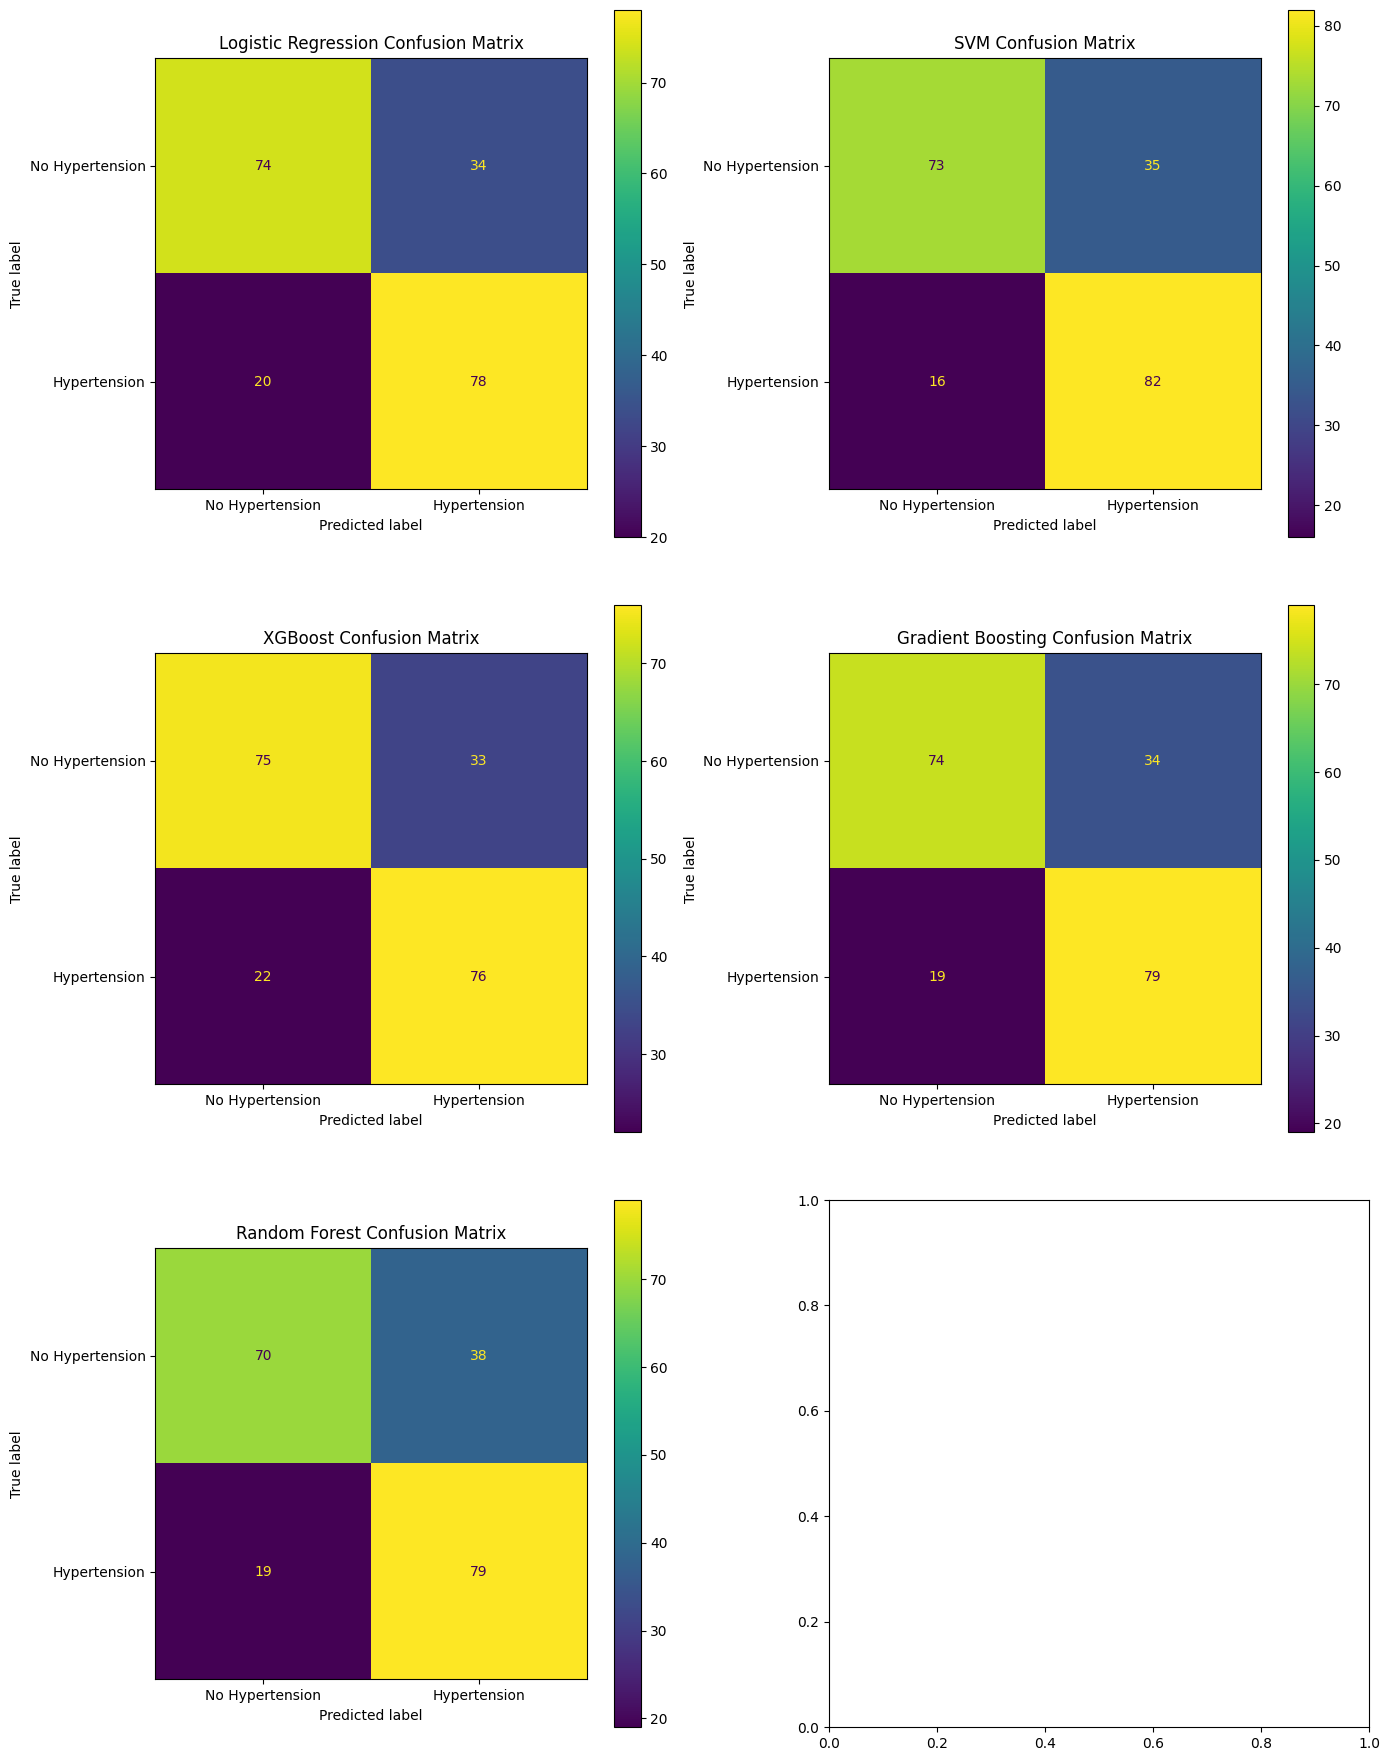

In [ ]:

fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hypertension', 'Hypertension'])
    disp.plot(ax=axes[idx], values_format='d')
    axes[idx].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()
